# Demo of `random_pmfs` module

In [10]:
import numpy as np
from numpy import zeros, exp, log
from scipy.special import loggamma

from matplotlib import rc
from matplotlib.pyplot import rcParams, subplots, subplots_adjust

from random_pmfs import BinnedPDF, DirichletPMFs

In [4]:
# Some plotting customizations:

rcParams['figure.figsize'] = (7,5)
rc('figure.subplot', bottom=.125, top=.95, left=0.1, right=.95)  # left=0.125
rc('font', size=14)  # default for labels (not axis labels)
rc('font', family='serif')  # default for labels (not axis labels)
rc('axes', labelsize=14)
rc('xtick.major', pad=8)
rc('xtick', labelsize=12)
rc('ytick.major', pad=8)
rc('ytick', labelsize=12)
rc('savefig', dpi=300)
rc('axes.formatter', limits=(-4,4))

In [6]:
def gaussian(x):
    """
    An unnormalized Gaussian function with mean 5 and standard devn 1.
    """
    return exp(-0.5*(x-5)**2/1)

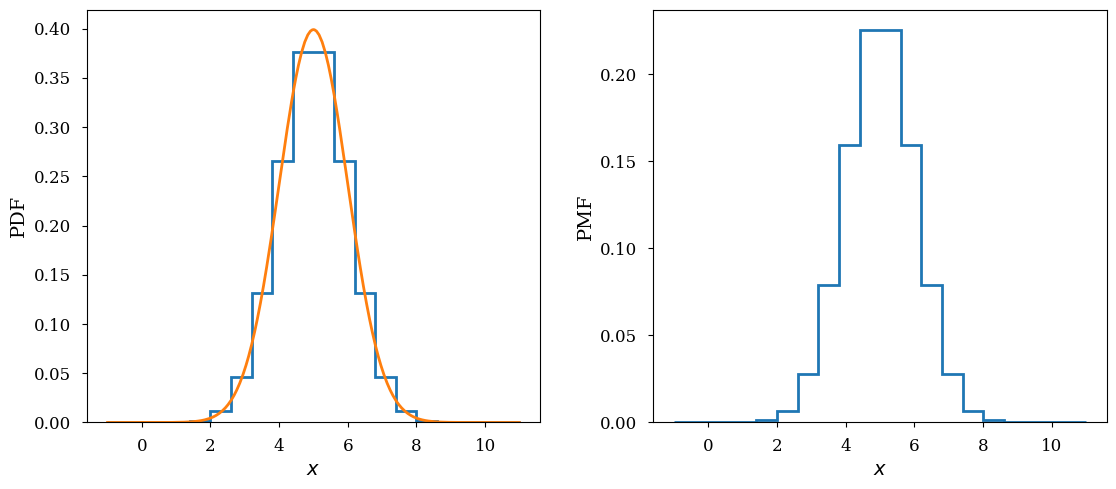

In [7]:
# Gaussian histogram, equal-sized bins:
g_pmf = BinnedPDF(20, (-1., 11.))
g_pmf.set_pdf(gaussian)
fig, axs = subplots(1, 2, figsize=(12,5))
subplots_adjust(wspace=.25)
g_pmf.plot_pdfs(axs[0])
g_pmf.plot_pmf(axs[1])

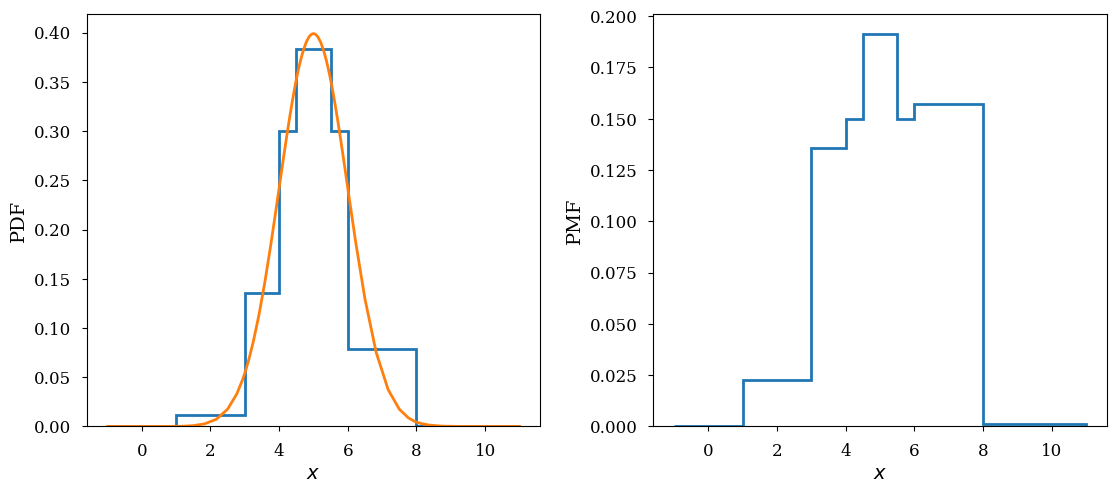

In [8]:
# Gaussian histogram, unequal-sized bins:
bins = [-1., 1., 3., 4., 4.5, 5., 5.5, 6., 8., 11.]
g_pmf = BinnedPDF(bins, qopen=False)
g_pmf.set_pdf(gaussian)
fig, axs = subplots(1, 2, figsize=(12,5))
subplots_adjust(wspace=.25)
g_pmf.plot_pdfs(axs[0])
g_pmf.plot_pmf(axs[1])

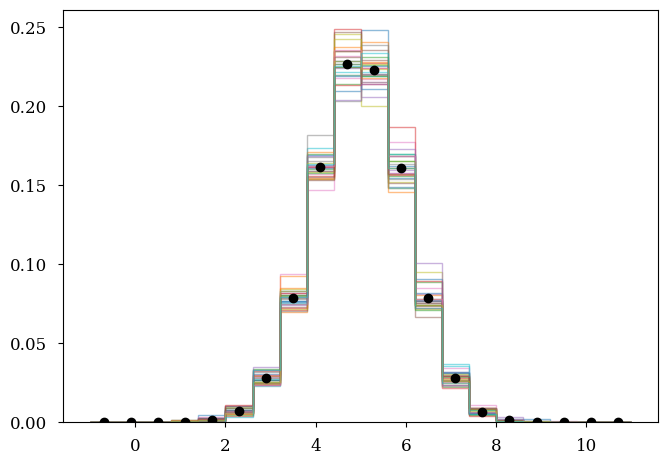

In [12]:
# Sample PMFs using an uniformly binned Gaussian base dist'n.
nbins = 20
g_pmf = BinnedPDF(nbins, (-1., 11.), pdf=gaussian)
conc = nbins + nbins*100
g_dir = DirichletPMFs(g_pmf, conc)
fig, ax = subplots()
means = zeros(nbins)
nsamp = 30
for i in range(nsamp):
    pmf = g_dir.sample()
    means += pmf.pmf
    pmf.plot(ax, alpha=0.5)
means = means/nsamp
ax.plot(g_pmf.centers, means, 'ko')

In [13]:
# Mixture of gammas cases:

def gamma_ms(x, mu, sig):
    """
    The PDF for a gamma distribution over `x` with mean `mu` and standard
    deviation `sig`.
    """
    a = (mu/sig)**2  # shape parameter
    scale = sig**2/mu
    val = x/scale
    val = (a-1.)*log(val) - val - log(scale) - loggamma(a)
    return exp(val)


def gamma_mix(x):
    """
    A mixture of three gamma distributions, producing a lumpy
    PDF over positive x.
    """
    return 0.3*gamma_ms(x, .4, .3) + .35*gamma_ms(x, .45, .15) + \
        .35*gamma_ms(x, .8, .15)

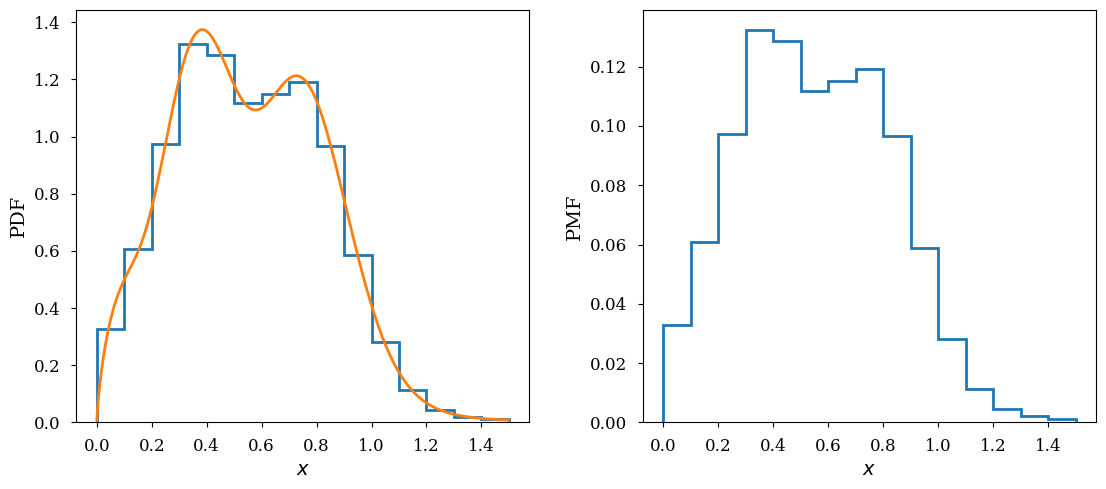

In [14]:
nbins = 15
gm_pmf = BinnedPDF(nbins, (0., 1.5), pdf=gamma_mix, qpts=15)
fig, axs = subplots(1, 2, figsize=(12,5))
subplots_adjust(wspace=.25)
gm_pmf.plot_pdfs(axs[0])
gm_pmf.plot_pmf(axs[1])

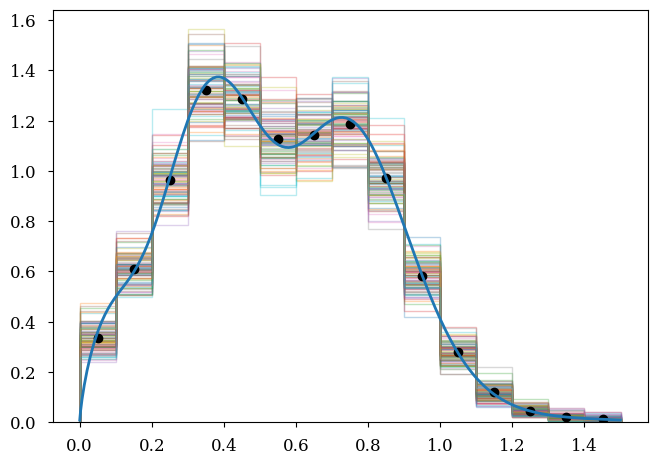

In [16]:
# Set concentration by setting a typical number of objects
# found per bin.
conc = nbins + nbins*100
gm_dir = DirichletPMFs(gm_pmf, conc)
fig, ax = subplots()
means = zeros(nbins)
nsamp = 100
for i in range(nsamp):
    pmf = gm_dir.sample()
    means += pmf.pmf
    pmf.plot_pdf(ax, alpha=.3)
means = means/nsamp
ax.plot(gm_pmf.centers, means/gm_pmf.widths, 'ko')
gm_pmf.plot_pdf(ax)

In [17]:
# How fast?
import timeit  # note timeit disables GC
start_time = timeit.default_timer()
pmfs = gm_dir.distn.rvs(10000)
elapsed = timeit.default_timer() - start_time
print('pmfs shape:', pmfs.shape)
print('Time for 10000 samples (sec):', elapsed)

pmfs shape: (10000, 15)
Time for 10000 samples (sec): 0.0064618560136295855
